## Pengenalan Pandas

Pandas adalah package populer python yang digunakan untuk data structure dan data analysis

Pandas identik dengan:
1. Data munging 
2. Data wrangling 
3. Data cleansing

ketiga hal tersebut adalah data prerpocessing. yang mencakup: 
1. Transformasi data
2. Penyiapan data mentah

di dalam data munging dan data wrangling ada: 

1. Reshaping 
2. Joining data 
3. splitting 
4. Time Series Data

Di pandas ada 2 data object: 
1. Series 
2. Dataframe

 Series adalah data yang berbentuk 1 dimensi

## Praktek
### DataSeries

In [71]:
# import module pandas dan numpy
import numpy as np
import pandas as pd

x = np.arange(1, 6)

In [4]:
x

array([1, 2, 3, 4, 5])

In [7]:
data1 = pd.Series([0.2, 0.21, 2.3, 5.5])
data1

0    0.20
1    0.21
2    2.30
3    5.50
dtype: float64

In [8]:
data2 = pd.Series([0.2, 0.21, 2.3, 5.5], ["a", "b", "c", "d"])
data2

a    0.20
b    0.21
c    2.30
d    5.50
dtype: float64

In [10]:
area_dict = {"Kota A" : 1000, "Kota B" : 2000, "Kota C": 45000, "Kota D":405000, "Kota E":60000}
area = pd.Series(area_dict)
area

Kota A      1000
Kota B      2000
Kota C     45000
Kota D    405000
Kota E     60000
dtype: int64

In [12]:
area.max()

405000

### DataFrame

In [26]:
data3 = pd.DataFrame(np.random.rand(3,2), columns=['index harga', 'index saham'], index=np.arange(1, 4))
data3

,index harga,index saham
1,0.199461,0.940192
2,0.142680,0.541728
3,0.671629,0.936394


## Impor CSV dan analisis data sederhana

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot style
# command yang diawali dengan % atau %% adalah magic command


Import data csv

In [4]:
heights = pd.read_csv("G:/pintaria/Python analisis dan visualisasi data/3. Pengenalan Pandas/president_heights.csv") # import data

Text(0,0.5,'number')

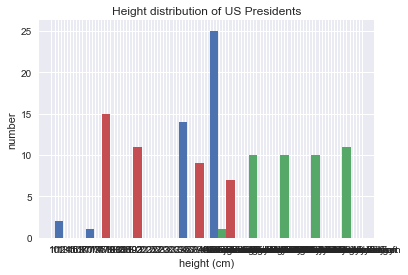

In [20]:
# plot data
%matplotlib qt5
%matplotlib inline
plt.hist(heights)
plt.title("Height distribution of US Presidents")
plt.xlabel("height (cm)")
plt.ylabel("number")

In [6]:
height_data = np.array(heights["height(cm)"]) # mengambil data pada kolom height dataset untuk dijadikan array dan siap dianalisa
presidentsname_data = np.array(heights["name"]) 
print("Mean height: ", height_data.mean())
print("Standard deviation: ", height_data.std())
print("Maximum height: ", height_data.max(), "order: ", presidentsname_data[height_data.argmax()])
print("Minimum data: ", height_data.min(), "order: ", presidentsname_data[height_data.argmin()])

Mean height:  179.73809523809524
Standard deviation:  6.931843442745892
Maximum height:  193 order:  Abraham Lincoln
Minimum data:  163 order:  James Madison


In [27]:
print("25th percentile: ", np.percentile(height_data, 25))
print("Median: ", np.median(height_data))
print("75th percentile: ", np.percentile(height_data, 75))

25th percentile:  174.25
Median:  182.0
75th percentile:  183.0


Text(0,0.5,'frequency number')

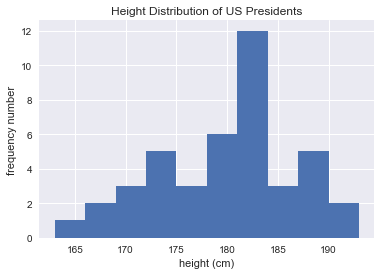

In [8]:
plt.hist(height_data)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('frequency number')

dari histogram di atas dapat disimpulkan: 1. tinggi badan terendah 165 paling sedikit dan paling banyak berada pada tinggi badan antara 180 - 185

### Mengatasi data yang tidak lengkap

In [1]:
import numpy as np
import pandas as pd

In [3]:
vals1 = np.array([1, np.nan, 3, 4])
vals1

array([ 1., nan,  3.,  4.])

In [4]:
vals1.sum()

nan

proses aritmatika nan menggunakan np.nansum, np.nanmin, np.nanmax untuk menghindari nan

In [6]:
np.nansum(vals1)

8.0

In [9]:
data = pd.Series([1, 2, np.nan, 4, None])
data.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

## menyeleksi data yang null

In [10]:
data[data.notnull()]

0    1.0
1    2.0
3    4.0
dtype: float64

In [11]:
data.dropna()

0    1.0
1    2.0
3    4.0
dtype: float64

In [14]:
df = pd.DataFrame([[1, np.nan, 4],
                 [4, 5, np.nan],
                 [6, 7, 8]])
df

,0,1,2
0,1,NaN,4.0
1,4,5.0,NaN
2,6,7.0,8.0


In [15]:
df.dropna() # apabila menggunakan dropna makan index yang terdapat NaN akan hilang

,0,1,2
2,6,7.0,8.0


In [16]:
df.dropna(axis="columns") # gunakan argumen axis = columns untuk menghilangkan data dari column bukan index

,0
0,1
1,4
2,6


In [20]:
df.dropna(axis="columns", how="all") # gunakan argumen all, hanya mengedrop column yang full dengan NaN, jika hanya satu elemen maka tidak ada column yg didrop

,0,1,2
0,1,NaN,4.0
1,4,5.0,NaN
2,6,7.0,8.0


In [22]:
df.dropna(axis="rows", thresh=3) # argumen thresh untuk membuat rows yg didrop minimal harus memiliki 2 elemen yg tidak nan

,0,1,2
2,6,7.0,8.0


### Imputation

In [23]:
data = pd.Series([1, 2, 3, np.nan, 4, 6], index = list('abcdef'))
data

a    1.0
b    2.0
c    3.0
d    NaN
e    4.0
f    6.0
dtype: float64

In [25]:
data.fillna(data.mean()) # menggantikan nilai null dengan nilai default yaitu 0

a    1.0
b    2.0
c    3.0
d    3.2
e    4.0
f    6.0
dtype: float64

## Menggabungkan data dengan Pandas

In [30]:
def make_df(cols, ind):
    "membuat dataframe user input"
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [36]:
"Membuat class display() supaya bisa menampilkan beberapa object sekaligus"

class display(object):
    """Display HTML representation of multiple object"""
    template = """<div style = "float: left; padding: 10px;"><p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}</div>"""
    def __init__(self, *args):
        self.args = args
    
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

## function concat() untuk concatenate pandas object (Series dan DataFrame). Concatenate bisa dibuat dengan menambahkan bari (rows) maupun menambahkan kolom (columns).

In [33]:
print("contoh pada Series")
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1,ser2])

contoh pada Series


1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [37]:
"Contoh pada DatFrame"
df1 = make_df('AB', [1,2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [39]:
"Contoh menggabungkan DataFrame berdasarkan kolom"
df4 = make_df('AB', [0, 1])
df5 = make_df('CD', [0, 1])
"axis = 1 to make column-wise concatenation"
display('df4', 'df5', "pd.concat([df4, df5], axis=1)")

df4
    A   B
0  A0  B0
1  A1  B1

df5
    C   D
0  C0  D0
1  C1  D1

pd.concat([df4, df5], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

In [40]:
"Menangani concate yang menghasilkan duplicate index"
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make duplicate indices
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [41]:
"cara 1. Mendeteksi apakah ada duplikat index dengan try catch block"
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("Error:", e)

Error: Indexes have overlapping values: [0, 1]


In [42]:
"Cara 2: ignore original index"
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [43]:
"cara 3: ditambahkan key"
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

In [44]:
"By default, concatenate menggunakan outer join"
"Kalau ada nama kolom yang tidak matching, by default akan diisi dengan NaN"
df6 = make_df('ABC', [1, 2])
df7 = make_df('BCD', [3, 4])
display('df6', 'df7', 'pd.concat([df6, df7])')

df6
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df7
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df6, df7])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [45]:
"Kita bisa menggunakan join yang lebih sesuai"
"contoh inner join"
display('df6', 'df7', "pd.concat([df6, df7], join='inner')")

df6
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df7
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df6, df7], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [46]:
"Contoh left outer join"
display('df6', 'df7', "pd.concat([df6, df7], join_axes=[df6.columns])")

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4
,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


In [47]:
"Contoh right outer join"
display('df6', 'df7', "pd.concat([df6, df7], join_axes=[df7.columns])")

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4
,B,C,D
1,B1,C1,NaN
2,B2,C2,NaN
3,B3,C3,D3
4,B4,C4,D4


In [48]:
"Kalau ada yang ketinggalan, append() function bisa digunakan untuk menggabungkan"
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [52]:
"membuat versi lain dari class display()"
class tampilkan(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;"><p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}</div>"""
    def __init__(self, *args):
        self.args = args
    
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

In [53]:
"create 2 dataframe"
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'], 'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'], 'hire_date':[2004, 2008, 2012, 2014]})

tampilkan('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [54]:
"dengan merge() menggabungkan 2 dataframes dengan mencari matching column name sebagai key"
"contoh one-to-one join menggunakan employee sebagai key"
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [55]:
"merge() otomatis menyesuaikan dengan kondisi data"
"contoh one-to-many join"
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 'supervisor':['Carly', 'Guido', 'Steve']})
tampilkan('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

In [57]:
"contoh many to many join"
df5 = pd.DataFrame({'group':['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                   'skills':['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})
tampilkan('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


In [64]:
"contoh memberitahukan column yang dijadikan key"
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'salary': [7000, 8500, 12000, 9000]})
tampilkan('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob    7000
1  Jake    8500
2  Lisa   12000
3   Sue    9000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob    7000
1     Jake  Engineering  Jake    8500
2     Lisa  Engineering  Lisa   12000
3      Sue           HR   Sue    9000

In [65]:
"tambahkan drop untuk memilih name atau employee karena memiliki value yang sama"
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1) # axis 1 adalah column, axis 0 adalah index atau rows

,employee,group,salary
0,Bob,Accounting,7000
1,Jake,Engineering,8500
2,Lisa,Engineering,12000
3,Sue,HR,9000


In [66]:
"contoh merge by index"
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [68]:
tampilkan('df1a', 'df2a', "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [72]:
"alternatif dengan function join()"
tampilkan('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


# Membat Pivot Table

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns

In [78]:
titanic = sns.load_dataset('titanic') 

In [79]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [82]:
"mencari rata2 selamat(survived) tiap gender dengan class sebagai column"
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [83]:
"mencari rata2 usia penumpang berdasarkan sex dan class sebagai column"
titanic.pivot_table('age', index="sex", columns="class")

class,First,Second,Third
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [84]:
"fungsi cut untuk partisi data sesuai keinginan kita"
age = pd.cut(titanic['age'], [0, 18, 81])
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 81]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 81]  0.375000  0.071429  0.133663

In [88]:
"menggunakan agregate function"
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum})

survived             
class     First Second Third
sex                         
female       91     70    72
male         45     17    47

# DATA TIME_SERIES

data time-series sebenarnya identik dengan data finansial dimana terjadi pergerakan dari waktu ke waktu. Pandas sangat populer di bindang finance karena dilengkapi dengan banyak functions yang bisa digunakan untuk mengolah data finance.

Membicarakan financial data, tidak lepas dari time series data, data dicatat dari waktu ke waktu dan kemudian dipantau dari waktu ke waktu pergerakannya

contoh:
1. nilai index saham
2. nilai transaksi penjualan perusahaan
3. nilai tukar mata uang asing

In [89]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas_datareader import data

In [111]:
"Load yahoo data finance"
source = data.DataReader('F', start='2004', end='2016', data_source='morningstar')
source

Close     High    Low   Open    Volume
Symbol Date                                              
F      2004-01-01  16.06  16.0600  15.99  15.99         0
       2004-01-02  16.08  16.1500  16.03  16.10   9030400
       2004-01-05  16.59  16.6500  16.33  16.37  19947100
       2004-01-06  16.54  16.7300  16.39  16.72  16729600
       2004-01-07  16.99  17.0200  16.45  16.58  13800200
       2004-01-08  17.10  17.3400  17.00  17.15  16453199
       2004-01-09  16.56  16.7500  16.49  16.49  14455100
       2004-01-12  16.41  16.5500  16.12  16.52  12283100
       2004-01-13  16.28  16.4500  16.16  16.22  12760800
       2004-01-14  16.18  16.2800  15.75  16.18   9648500
       2004-01-15  16.05  16.2300  15.87  16.18  11371400
       2004-01-16  16.13  16.2300  16.07  16.11   6280500
       2004-01-19  16.13  16.2300  16.07  16.11         0
       2004-01-20  16.21  16.4000  16.15  16.25   9499200
       2004-01-21  16.44  16.4600  16.15  16.21   8538600
       2004-01-22  16.43  16.4500  16.15  16.44   8575100
       2004-01-23  15.83  16.3800  15.62  16.35  12886400
       2004-01-26  15.96  15.9800  15.52  15.83  10640600
       2004-01-27  15.94  16.3500  15.83  15.85   8349600
       2004-01-28  15.58  16.0100  15.50  16.01   9891200
       2004-01-29  14.84  15.5500  14.51  15.20  26054300
       2004-01-30  14.54  14.6500  14.33  14.40  16952900
       2004-02-02  13.95  14.3000  13.88  14.10  27205400
       2004-02-03  13.72  13.9300  13.62  13.89  23346500
       2004-02-04  13.89  14.0200  13.41  13.56  24415500
       2004-02-05  14.15  14.1900  13.80  14.00  11651400
       2004-02-06  14.28  14.2900  13.99  14.20  15186600
       2004-02-09  14.16  14.3000  14.03  14.11   6205400
       2004-02-10  14.39  14.4600  14.09  14.10   9905100
       2004-02-11  14.64  14.7200  14.25  14.46  11188100
...                  ...      ...    ...    ...       ...
       2015-11-23  14.55  14.7300  14.51  14.60  18273923
       2015-11-24  14.55  14.6300  14.32  14.41  21251696
       2015-11-25  14.55  14.6800  14.52  14.54  12624958
       2015-11-26  14.55  14.5500  14.55  14.55         0
       2015-11-27  14.53  14.5900  14.50  14.54   7760586
       2015-11-30  14.33  14.5500  14.29  14.54  27859262
       2015-12-01  14.56  14.5600  14.29  14.32  29140257
       2015-12-02  14.26  14.6200  14.24  14.60  21394847
       2015-12-03  13.98  14.3350  13.93  14.31  29844171
       2015-12-04  14.20  14.2600  14.00  14.08  28353661
       2015-12-07  14.12  14.2000  14.02  14.19  14530246
       2015-12-08  13.97  14.1000  13.88  14.03  30355769
       2015-12-09  13.89  14.1400  13.80  13.91  25188804
       2015-12-10  13.96  14.0900  13.89  13.91  22030711
       2015-12-11  13.64  13.9200  13.58  13.84  29569662
       2015-12-14  13.62  13.7400  13.40  13.66  26816518
       2015-12-15  13.87  14.0000  13.72  13.74  43720556
       2015-12-16  14.36  14.3600  13.99  14.00  40682751
       2015-12-17  13.98  14.3800  13.95  14.37  26168658
       2015-12-18  13.80  13.9100  13.72  13.88  40380348
       2015-12-21  13.73  13.9500  13.67  13.89  31594307
       2015-12-22  14.20  14.2500  13.90  13.93  50641107
       2015-12-23  14.36  14.3800  14.26  14.27  22171438
       2015-12-24  14.31  14.3700  14.25  14.35   9000079
       2015-12-25  14.31  14.3100  14.31  14.31         0
       2015-12-28  14.18  14.3350  14.16  14.28  13695285
       2015-12-29  14.23  14.3000  14.15  14.28  18867589
       2015-12-30  14.17  14.2600  14.12  14.23  13799939
       2015-12-31  14.09  14.1635  14.04  14.14  19881021
       2016-01-01  14.09  14.0900  14.09  14.09         0

[3132 rows x 5 columns]

In [112]:
source = source['Close']

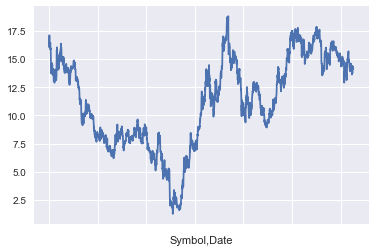

In [106]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
source.plot()